# **1. 포켓몬 분류**
* [Train 데이터](https://www.kaggle.com/datasets/thedagger/pokemon-generation-one)
* [Validation 데이터](https://www.kaggle.com/hlrhegemony/pokemon-image-dataset)
kaggle.comkaggle.com
Pokemon Generation One
Gotta train 'em all!
kaggle.comkaggle.com
Complete Pokemon Image Dataset
2,500+ clean labeled images, all official art, for Generations 1 through 8.

In [18]:
import os

In [19]:
os. environ ['KAGGLE_USERNAME'] = 'hanbii4167'
os. environ ['KAGGLE_KEY'] = '2ccc99fec9df39d7b0daa63282e268b2'

In [20]:
!kaggle datasets download -d thedagger/pokemon-generation-one

Dataset URL: https://www.kaggle.com/datasets/thedagger/pokemon-generation-one
License(s): GPL-2.0
pokemon-generation-one.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
!unzip -q /content/pokemon-generation-one.zip

In [22]:
!kaggle datasets download -d hlrhegemony/pokemon-image-dataset

Dataset URL: https://www.kaggle.com/datasets/hlrhegemony/pokemon-image-dataset
License(s): CC0-1.0
pokemon-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
!unzip -q /content/pokemon-image-dataset.zip

In [24]:
! mv dataset train #dataset의 데이터를 train폴더(생성) 로 이동

In [25]:
! rm -rf train/dataset

In [26]:
! mv images validation

In [27]:
train_labels = os.listdir('train')
print(train_labels)
print(len(train_labels))

['Doduo', 'Moltres', 'Charmeleon', 'Magmar', 'Raichu', 'Aerodactyl', 'Haunter', 'Caterpie', 'Exeggcute', 'Pinsir', 'Grimer', 'Golem', 'Dratini', 'Poliwrath', 'Horsea', 'Seadra', 'Mew', 'Vileplume', 'Primeape', 'Vulpix', 'Rhyhorn', 'Oddish', 'Victreebel', 'Squirtle', 'Vaporeon', 'Seel', 'Pidgeotto', 'Venusaur', 'Bellsprout', 'Scyther', 'Dragonite', 'Growlithe', 'Staryu', 'Metapod', 'Bulbasaur', 'MrMime', 'Cloyster', 'Gloom', 'Tauros', 'Goldeen', 'Weezing', 'Chansey', 'Poliwhirl', 'Articuno', 'Tentacruel', 'Zapdos', 'Lapras', 'Mewtwo', 'Magneton', 'Clefable', 'Arcanine', 'Dodrio', 'Raticate', 'Psyduck', 'Kabuto', 'Abra', 'Seaking', 'Golduck', 'Machamp', 'Onix', 'Spearow', 'Pikachu', 'Charmander', 'Magikarp', 'Eevee', 'Magnemite', 'Nidoking', 'Paras', 'Tentacool', 'Weedle', 'Marowak', 'Charizard', 'Ekans', 'Wigglytuff', 'Omastar', 'Snorlax', 'Kabutops', 'Sandslash', 'Dragonair', 'Dugtrio', 'Muk', 'Slowbro', 'Shellder', 'Hypno', 'Poliwag', 'Butterfree', 'Pidgeot', 'Rattata', 'Ponyta', 'Dro

In [28]:
val_labels = os.listdir('validation')
print(val_labels)
print(len(val_labels))

['Doduo', 'Moltres', 'Charmeleon', 'Magmar', 'Raichu', 'Aerodactyl', 'Haunter', 'Caterpie', 'Exeggcute', 'Pinsir', 'Grimer', 'Golem', 'Dratini', 'Poliwrath', 'Horsea', 'Seadra', 'Mew', 'Vileplume', 'Primeape', 'Vulpix', 'Rhyhorn', 'Oddish', 'Victreebel', 'Squirtle', 'Vaporeon', 'Seel', 'Pidgeotto', 'Venusaur', 'Bellsprout', 'Scyther', 'Dragonite', 'Growlithe', 'Staryu', 'Metapod', 'Bulbasaur', 'MrMime', 'Cloyster', 'Gloom', 'Tauros', 'Goldeen', 'Weezing', 'Chansey', 'Poliwhirl', 'Articuno', 'Tentacruel', 'Zapdos', 'Lapras', 'Mewtwo', 'Magneton', 'Clefable', 'images', 'Arcanine', 'Dodrio', 'Raticate', 'Psyduck', 'Kabuto', 'Abra', 'Seaking', 'Golduck', 'Machamp', 'Onix', 'Spearow', 'Pikachu', 'Charmander', 'Magikarp', 'Eevee', 'Magnemite', 'Nidoking', 'Paras', 'Tentacool', 'Weedle', 'Marowak', 'Charizard', 'Ekans', 'Wigglytuff', 'Omastar', 'Snorlax', 'Kabutops', 'Sandslash', 'Dragonair', 'Dugtrio', 'Muk', 'Slowbro', 'Shellder', 'Hypno', 'Poliwag', 'Butterfree', 'Pidgeot', 'Rattata', 'Pon

In [29]:
import shutil

In [30]:
for val_label in val_labels:
  if val_label not in train_labels:
    shutil.rmtree(os.path.join('validation',val_label))

In [31]:
val_labels = os.listdir('validation')
len(val_labels)

149

In [39]:
# train 데이터에는 있고 validation 데이터에는 없는 포켓몬 종류는 무엇일까 ?
for train_label in train_labels:
  if train_label not in val_labels:
    print(train_label)

In [42]:
for train_label in train_labels:
  if train_label not in val_labels:
    print(train_label)
    os.makedirs(os.path.join('validation',train_label), exist_ok=True)

In [34]:
val_labels = os.listdir('validation')
len(val_labels)

149

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Fix typo: 'is_avaliable' -> 'is_available'
device

device(type='cuda')

In [38]:
data_transforms = {
    'train' : transforms.Compose([
        transforms.Resize((224, 224)),
        #각도, 찌그러짐, 크기변경
        transforms.RandomAffine(30, scale=(0.8, 1.2), shear =10),
        #수평으로 뒤집기
        transforms.RandomHorizontalFlip(), #Fixed typo in function name
        transforms.ToTensor()
    ]),
    'validation' : transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
        ])
}

In [41]:
image_datasets = {
    'train' : datasets.ImageFolder('train', data_transforms['train']),
    'validation' : datasets.ImageFolder('validation', data_transforms['validation'])
}

In [53]:
dataloaders = { # Fixed the typo here
    'train' : DataLoader(
        image_datasets['train'],
        batch_size = 32,
        shuffle = True
    ),
    'validation' : DataLoader (
        image_datasets['validation'],
        batch_size = 32,
        shuffle = False
    )
}

In [54]:
len(image_datasets['train']), len(image_datasets['validation'])

(10657, 661)

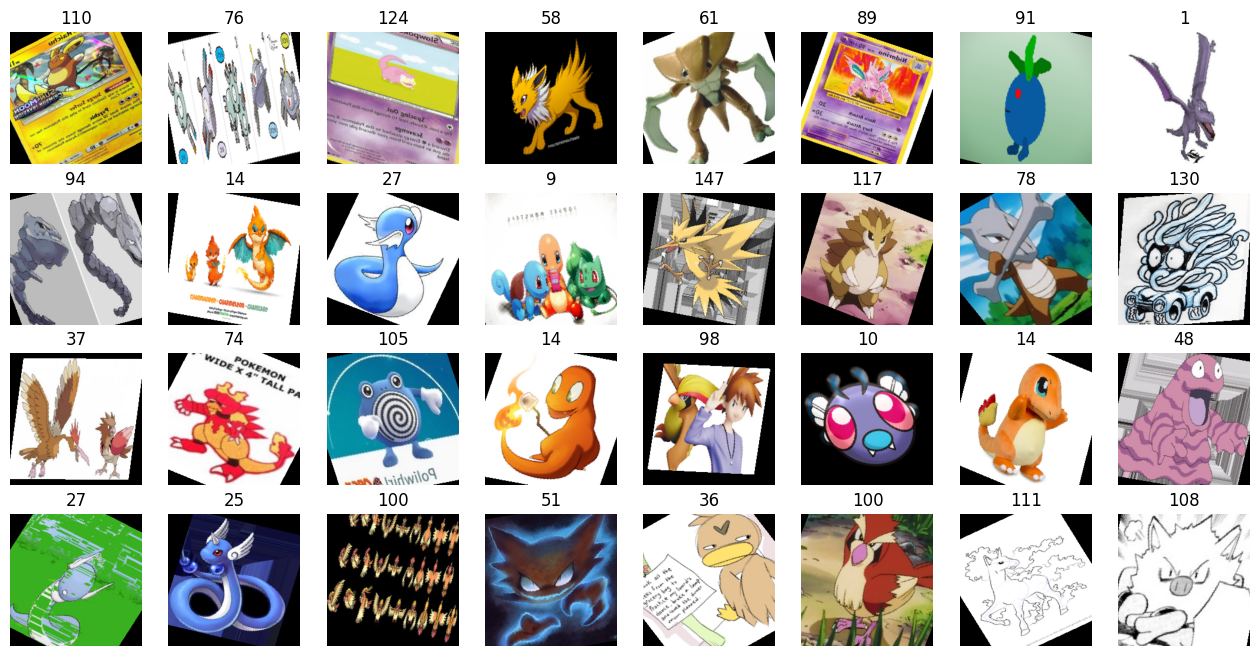

In [55]:
imgs, labels = next(iter(dataloaders['train']))

fig, axes = plt.subplots(4, 8, figsize=(16, 8))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.permute(1, 2, 0)) # (3,224,224) -> (224,224,3)
    ax.set_title(label.item())
    ax.axis('off')

In [56]:
image_datasets['train'].classes[21]

'Diglett'

# **2. EfficientNet **
 * [EfficientNet](https://skyengine.ai/se/skyengine-blog/121-what-is-efficientnet)
 * 구글의 연구팀이 개발한 이미지 분류, 객체 검출 등 컴퓨터 비전 작업에서 높은 성능을 보여주는 신경망 모델
 * 신경망의 깊이, 너비, 해상도를 동시에 확장하는 방법을 통해 효율성과 성능을 극대화하는 것이 특징
 * EfficientB4는 Efficient 시리즈의 중간크기 모델

In [57]:
from torchvision.models import efficientnet_b4, EfficientNet_B4_Weights
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url

In [59]:
def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)
WeightsEnum.get_state_dict = get_state_dict
model = efficientnet_b4(weights=EfficientNet_B4_Weights.IMAGENET1K_V1).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-23ab8bcd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-23ab8bcd.pth
100%|██████████| 74.5M/74.5M [00:00<00:00, 413MB/s]


In [62]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [63]:
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(
    nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512,149)
).to(device)

In [64]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [65]:
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [66]:
epochs = 10

In [74]:
for epoch in range(epochs):
    for phase in ['train', 'validation']:
        if phase == 'train':
            model.train()
        else:
            model.eval()


        sum_losses = 0
        sum_accs = 0


        for x_batch, y_batch in dataloaders[phase]:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(x_batch)


            loss = nn.CrossEntropyLoss()(y_pred, y_batch)
            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()


            sum_losses = sum_losses + loss
            y_prob = nn.Softmax(1)(y_pred)
            y_pred_index = torch.argmax(y_prob, axis=1)


            acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
            sum_accs = sum_accs + acc


        avg_loss = sum_losses / len(dataloaders[phase])
        avg_acc = sum_accs / len(dataloaders[phase])
        print(f'{phase:10s}: Epoch {epoch+1:4d}/{epochs} Loss: {avg_loss:.4f} Accuracy: {avg_acc:.2f}%')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train     : Epoch    1/10 Loss: 3.4685 Accuracy: 26.62%
validation: Epoch    1/10 Loss: 1.6515 Accuracy: 60.46%
train     : Epoch    2/10 Loss: 2.0494 Accuracy: 52.41%
validation: Epoch    2/10 Loss: 1.1355 Accuracy: 75.57%
train     : Epoch    3/10 Loss: 1.6302 Accuracy: 59.76%
validation: Epoch    3/10 Loss: 0.8887 Accuracy: 79.52%
train     : Epoch    4/10 Loss: 1.4967 Accuracy: 62.68%
validation: Epoch    4/10 Loss: 0.7869 Accuracy: 82.21%
train     : Epoch    5/10 Loss: 1.3497 Accuracy: 65.72%
validation: Epoch    5/10 Loss: 0.7139 Accuracy: 83.25%
train     : Epoch    6/10 Loss: 1.2932 Accuracy: 67.52%
validation: Epoch    6/10 Loss: 0.6531 Accuracy: 83.99%
train     : Epoch    7/10 Loss: 1.1942 Accuracy: 68.87%
validation: Epoch    7/10 Loss: 0.6453 Accuracy: 84.44%
train     : Epoch    8/10 Loss: 1.0823 Accuracy: 71.93%
validation: Epoch    8/10 Loss: 0.6275 Accuracy: 85.18%
train     : Epoch    9/10 Loss: 1.0350 Accuracy: 72.56%
validation: Epoch    9/10 Loss: 0.6044 Accuracy:

In [75]:
# 학습된 모델 파일을 저장
torch.save(model.state_dict(), 'model.pth') # model.h5

In [79]:
model = models.efficientnet_b4().to(device)

In [80]:
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(
    nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512,149)
).to(device)

In [81]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [82]:
model.load_state_dict(torch.load('model.pth'))
# model.load_state_dict(torch.load('model.pth'), strict = False )

<All keys matched successfully>

In [83]:
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [85]:
from PIL import Image

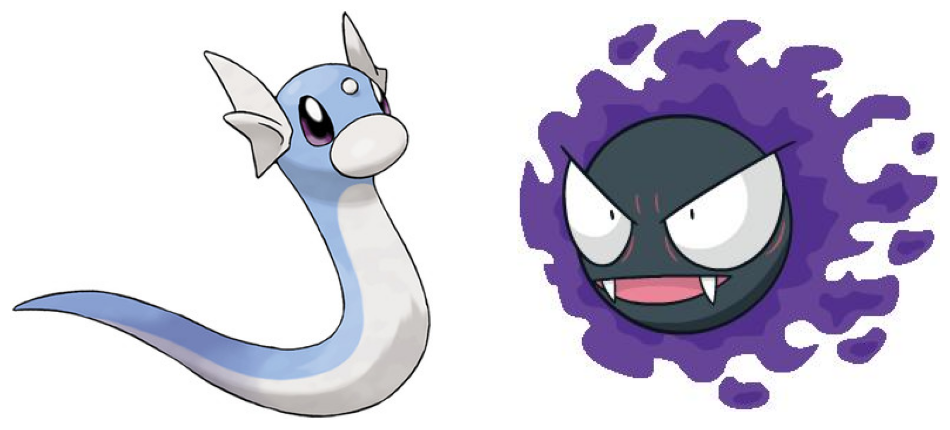

In [90]:
img1 = Image.open('/content/validation/Dratini/0.jpg')
img2 = Image.open('/content/validation/Gastly/3.jpg')

ig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()

In [91]:
img1_input = data_transforms['validation'](img1)
img2_input = data_transforms['validation'](img2)
print(img1_input.shape)
print(img2_input.shape)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [92]:
test_batch = torch.stack([img1_input, img2_input])
test_batch = test_batch.to(device)
test_batch.shape

torch.Size([2, 3, 224, 224])

In [93]:
y_pred = model(test_batch)
y_pred

tensor([[-11.4077, -10.5075, -15.7529,  -7.7920, -12.5259,  -6.7233, -14.4397,
         -10.2786, -12.0475, -14.5537, -13.1760, -14.1114, -15.4880, -11.9968,
          -6.4372, -12.3610, -15.4847, -15.8559, -12.5985, -10.5951,  -3.2677,
         -10.2824, -15.9338,  -9.9532,  -7.3031,   2.6909,  -5.1790,   6.0749,
         -13.3858, -19.5845, -10.4199,  -6.4755, -19.6606, -12.2095, -14.6476,
         -12.2740, -10.3865, -11.4995,  -8.6878, -11.3283, -14.0913, -16.0917,
         -13.2526,  -8.5947, -10.8084, -12.2582, -20.7366, -18.7178, -13.3675,
         -10.1513, -10.4071, -14.7573, -16.8412, -14.6584,  -7.2496, -10.9082,
         -17.2056, -11.7131, -17.4415, -19.1178, -16.5035, -15.9489, -14.7333,
         -15.6275, -14.4213, -14.6302, -19.0383, -11.4318,  -3.6431, -11.6415,
         -15.3325, -18.1834, -15.0551,  -8.6620, -13.6183,  -7.5359, -15.2812,
          -9.5580,  -8.5069, -10.5854, -11.0576,  -9.1873,  -8.2572,  -5.1530,
         -14.3751, -11.7932, -11.9432,  -8.7630, -10

In [94]:
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[2.4707e-08, 6.0780e-08, 3.2044e-10, 9.1853e-07, 8.0760e-09, 2.6746e-06,
         1.1914e-09, 7.6421e-08, 1.3031e-08, 1.0630e-09, 4.2155e-09, 1.6543e-09,
         4.1760e-10, 1.3709e-08, 3.5602e-06, 9.5236e-09, 4.1902e-10, 2.8908e-10,
         7.5107e-09, 5.5688e-08, 8.4721e-05, 7.6128e-08, 2.6740e-10, 1.0581e-07,
         1.4978e-06, 3.2792e-02, 1.2529e-05, 9.6697e-01, 3.4180e-09, 6.9453e-12,
         6.6346e-08, 3.4266e-06, 6.4362e-12, 1.1082e-08, 9.6777e-10, 1.0390e-08,
         6.8601e-08, 2.2540e-08, 3.7502e-07, 2.6749e-08, 1.6879e-09, 2.2835e-10,
         3.9049e-09, 4.1163e-07, 4.4987e-08, 1.0555e-08, 2.1945e-12, 1.6523e-11,
         3.4810e-09, 8.6788e-08, 6.7206e-08, 8.6722e-10, 1.0791e-10, 9.5737e-10,
         1.5800e-06, 4.0717e-08, 7.4963e-11, 1.8205e-08, 5.9209e-11, 1.1076e-11,
         1.5126e-10, 2.6341e-10, 8.8827e-10, 3.6325e-10, 1.2136e-09, 9.8478e-10,
         1.1992e-11, 2.4118e-08, 5.8204e-05, 1.9556e-08, 4.8786e-10, 2.8196e-11,
         6.4387e-10, 3.8482e

In [96]:
probs, idx = torch.topk(y_prob, k=3)
print(probs)
print(idx)

tensor([[9.6697e-01, 3.2792e-02, 8.4721e-05],
        [9.4840e-01, 2.7601e-02, 8.1612e-03]], device='cuda:0',
       grad_fn=<TopkBackward0>)
tensor([[27, 25, 20],
        [39, 40, 88]], device='cuda:0')


(-0.5, 299.5, 279.5, -0.5)

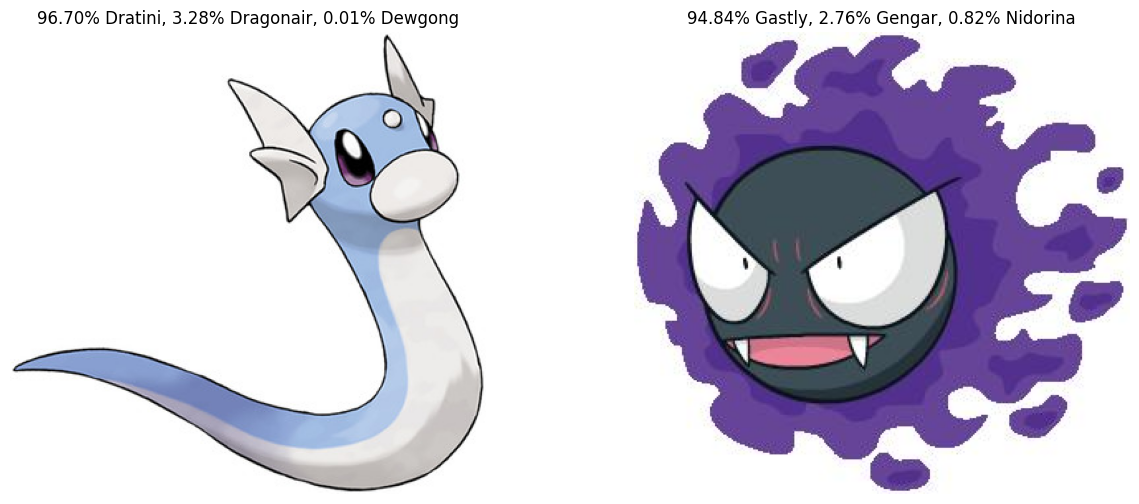

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[0, 0] * 100,
    image_datasets['validation'].classes[idx[0, 0]],
    probs[0, 1] * 100,
    image_datasets['validation'].classes[idx[0, 1]],
    probs[0, 2] * 100,
    image_datasets['validation'].classes[idx[0, 2]],
))

axes[0].imshow(img1)
axes[0].axis('off')
axes[1].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[1, 0] * 100,
    image_datasets['validation'].classes[idx[1, 0]],
    probs[1, 1] * 100,
    image_datasets['validation'].classes[idx[1, 1]],
    probs[1, 2] * 100,
    image_datasets['validation'].classes[idx[1, 2]],
))

axes[1].imshow(img2)
axes[1].axis('off')

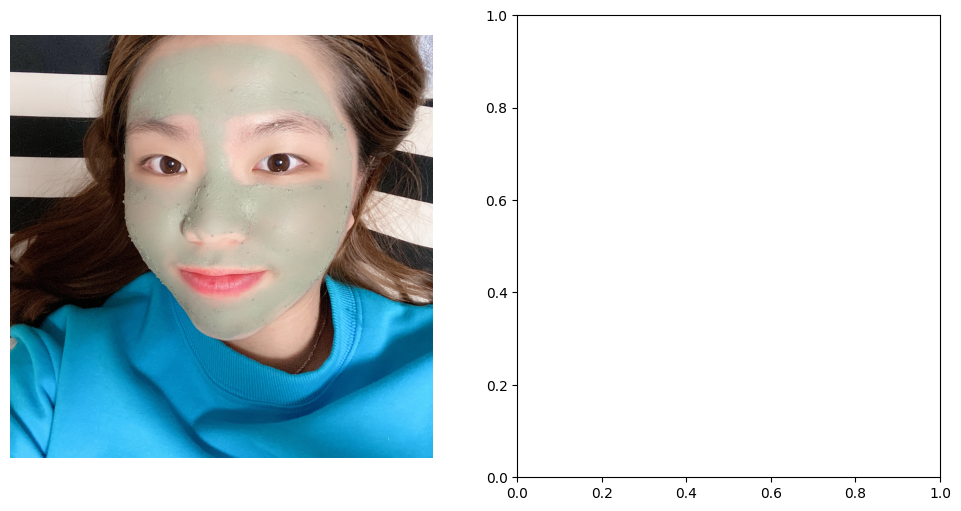

In [214]:
mypic = Image.open('/content/validation/윤정2.jpeg')

ig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(mypic)
axes[0].axis('off')
plt.show()

In [215]:
mypic_input = data_transforms['validation'](mypic)
print(mypic_input.shape)

torch.Size([3, 224, 224])


In [216]:
mypic_input = mypic_input.unsqueeze(0).to(device)
print(mypic_input.shape)

torch.Size([1, 3, 224, 224])


In [217]:
y_pred = model(mypic_input)
y_pred

tensor([[ -6.7587,  -6.5090, -11.7423,  -7.1035,  -7.7949,  -7.9646,  -6.7958,
          -7.7332,  -7.0847,  -4.3255,  -7.2067, -11.3993,  -6.0400, -10.5298,
          -9.6626,  -9.4372,  -8.0396,  -7.9595,  -7.8062,  -9.1057,  -6.7755,
          -8.9928,  -9.7459,  -7.8322,  -9.7373,  -8.5711, -10.2765,  -9.9720,
          -9.9446, -10.8259, -10.9710,  -8.8041,  -7.7208,  -7.5961,  -8.8929,
          -6.9963,  -9.6416,  -9.0051, -10.0798, -10.0637,  -7.1671,  -7.3236,
          -4.8870,  -5.5559,  -7.5881,  -8.3709,  -9.6047,  -9.7869,  -6.2078,
          -6.0946, -10.9282,  -7.2040,  -7.7887,  -8.9951,  -9.6654, -10.4932,
          -7.8770,  -5.7655, -11.0356,  -7.4372,  -8.6217,  -4.8524,  -7.7710,
         -11.1607,  -9.8660,  -7.7437,  -9.3861,  -7.5187,  -6.6567,  -5.2654,
          -5.7015,  -6.0581,  -7.0978,  -9.9470,  -9.5905,  -6.9404,  -7.3327,
          -5.6528,  -7.3895,  -7.8031, -10.2113,  -7.3706,  -5.4687,  -8.9500,
          -4.9920,  -4.0772,  -5.9702,  -7.4217,  -8

In [219]:
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[4.2727e-03, 5.4844e-03, 2.9265e-05, 3.0264e-03, 1.5159e-03, 1.2793e-03,
         4.1170e-03, 1.6124e-03, 3.0838e-03, 4.8686e-02, 2.7297e-03, 4.1237e-05,
         8.7662e-03, 9.8383e-05, 2.3417e-04, 2.9336e-04, 1.1868e-03, 1.2858e-03,
         1.4988e-03, 4.0869e-04, 4.2011e-03, 4.5751e-04, 2.1545e-04, 1.4603e-03,
         2.1730e-04, 6.9756e-04, 1.2675e-04, 1.7186e-04, 1.7663e-04, 7.3164e-05,
         6.3286e-05, 5.5255e-04, 1.6325e-03, 1.8492e-03, 5.0559e-04, 3.3691e-03,
         2.3914e-04, 4.5195e-04, 1.5429e-04, 1.5680e-04, 2.8399e-03, 2.4286e-03,
         2.7767e-02, 1.4225e-02, 1.8641e-03, 8.5215e-04, 2.4813e-04, 2.0680e-04,
         7.4118e-03, 8.3005e-03, 6.6053e-05, 2.7370e-03, 1.5252e-03, 4.5646e-04,
         2.3351e-04, 1.0205e-04, 1.3965e-03, 1.1535e-02, 5.9326e-05, 2.1678e-03,
         6.6312e-04, 2.8745e-02, 1.5526e-03, 5.2350e-05, 1.9107e-04, 1.5955e-03,
         3.0875e-04, 1.9981e-03, 4.7312e-03, 1.9020e-02, 1.2297e-02, 8.6085e-03,
         3.0438e-03, 1.7620e

In [220]:
probs, idx = torch.topk(y_prob, k=3)
print(probs)
print(idx)

tensor([[0.1930, 0.0946, 0.0624]], device='cuda:0', grad_fn=<TopkBackward0>)
tensor([[133, 105,  85]], device='cuda:0')


(-0.5, 1655.5, 1655.5, -0.5)

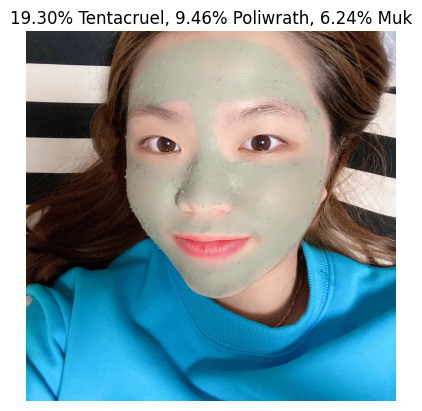

In [221]:
plt.title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[0, 0] * 100,
    image_datasets['validation'].classes[idx[0, 0]],
    probs[0, 1] * 100,
    image_datasets['validation'].classes[idx[0, 1]],
    probs[0, 2] * 100,
    image_datasets['validation'].classes[idx[0, 2]],
))
plt.imshow(mypic)
plt.axis('off')